<div style="text-align: right"><b>Gordon Tveito-Duncan</b></div>

***
# <center>Exploring employee attrition: why are employees leaving?</center>
***

# Table of Contents
1. [Loading the Data and Initial Analysis](#Loading-the-Data-and-Initial-Analysis)
> [Variable Summary](#Variable-Summary) <br>
> [Data Processing](#Data-Processing)

2. [Step 1: investigate the differences between employees that left/stayed](#Step-1:-investigate-the-differences-between-employees-that-left/stayed)
> [Aggregate Left/Stayed Split](#Aggregate-Left/Stayed-Split) <br>
> [Pairplot](#Pairplot) <br>
> [Correlation Analysis](#correlation_agg) <br>
> [Parallel Coordinates](#Parallel-Coordinates) <br>
> [Boxplots](#Boxplots) <br>
>> [Boxplots for Report](#Boxplots-for-Report)

3. [Step 2: investigate the differences between different performance clusters](#Step-2:-investigate-the-differences-between-different-performance-clusters)
> [Creating Performance Clusters Based on Interquartile Range (IQR)](#Creating-Performance-Clusters-Based-on-Interquartile-Range-(IQR)) <br>
> [Investigating High vs Normal Performing Employees](#Investigating-High-vs-Normal-Performing-Employees) <br>
> [Correlation Analysis](#correlation_split) <br>
>> [Normal Performers](#Normal-Performers) <br>
>> [High Performers](#High-Performers)

   > [Performance Clusters](#Performance-Clusters) <br>
   > [Exploring Differences in Variables Accross Performance Clusters](#Exploring-Differences-in-Variables-Accross-Performance-Clusters) <br>
   >> [Output for Report](#Output-for-Report) <br>
   
   > [Stacked Bar Chart for Salary Category by Performance Cluster](#Stacked-Bar-Chart-for-Salary-Category-by-Performance-Cluster) <br>
   > [Summary of High Performers](#Summary-of-High-Performers)

4. [Step 3: investigate the differences between departments](#Step-3:-investigate-the-differences-between-departments)
> [Investigating the Normal/High Performing Split Varies Accross Departments](#Investigating-the-Normal/High-Performing-Split-Varies-Accross-Departments)

5. [Step 4: build a predictive model](#Step-4:-build-a-predictive-model)
> [Preprocessing](#Preprocessing2) <br>
> [Random Forest Model](#Random-Forest-Model) <br>
> [Cross Validation](#Cross-Validation2) <br>
> [Predicting Test Cases](#Predicting-Test-Cases) <br>
> [Confusion Matrix](#Confusion-Matrix) <br>
> [ROC Curve](#ROC-Curve) <br>
> [Feature Importance for Random Forest Model](#Feature-Importance-for-Random-Forest-Model2) <br>
> [Investigating employees "at risk"](#Investigating-employees-"at-risk")

6. [Summary](#Summary)

7. [Policy Recommendations](#Policy-Recommendations)

8. [Future Work](#Future-Work)

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the Data and Initial Analysis

The data source can be found [here](https://www.kaggle.com/jacksonchou/hr-data-for-analytics#HR_comma_sep.csv).

In [2]:
df = pd.read_csv('data.csv') 

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# display information of dataset
print('The dataframe has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.describe(include='all')

The dataframe has 14999 rows and 10 columns


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
# inspect missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

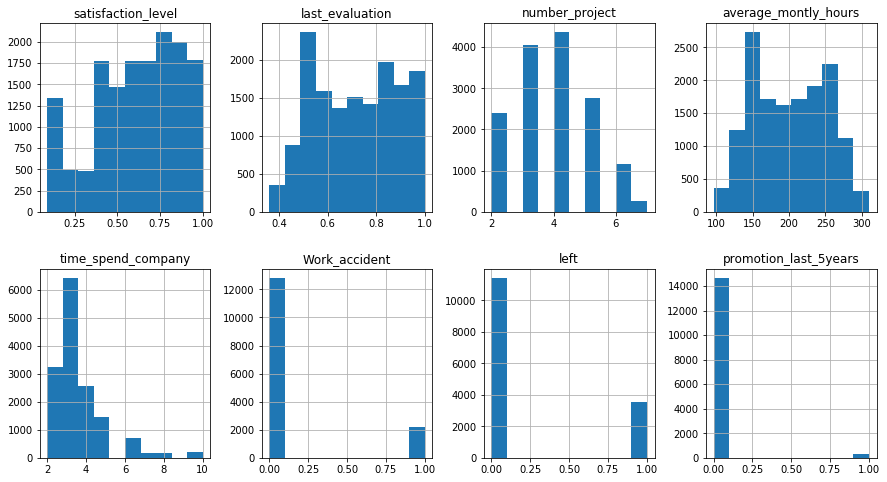

In [6]:
# this will select all the numeric columns
dfnum=df.select_dtypes(include='number')

# get the number of columns
numCols=dfnum.shape[1]

fig, axisRows = plt.subplots(2, 4, figsize=(15, 8))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            dfnum.hist(column = dfnum.columns[i], ax=axis)
            i = i+1

## Variable Summary
- _Satisfaction Level_: employee satisfaction rating; continuous variable ranging from 0 to 1, with 1 indicating the highest satisfaction level.
- _Last Evaluation_: employee performance evaluation rating; continuous variable ranging from 0 to 1, with 1 indicating the highest performance level.
- _Number of Projects_: number of projects the employee has worked on; discrete variable ranging from 2 to 7.
- _Average Monthly Hours_: the average number of hours worked each month; discrete variable ranging from 96 to 310.
- _Time Spend at the Company_: the number of years spent at the company; discrete variable ranging from 2 to 10 years.
- _Work Accident_: binary variable with 1 indicating that the employee has had an accident at work.
- _Left (or Stayed)_: binary variable with 1 indicating that the employee has left (for the purposes of this work we are assuming that "left" means that an employee left of their own accord rather than being fired/made redundant).
- _Promotion in the Last 5 Years_: binary variable with 1 indicating that the employee has had a promotion.
- _Sales_: categorical variable denoting which department the employee is in (the column header is incorrect); there are 10 different departments.
- _Salary_: categorical variable with categories "low", "medium", "high".

## Data Processing

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [8]:
# we rename the columns to make the headers clearer
df = df.rename(columns = {'satisfaction_level': 'satisfaction'})
df = df.rename(columns = {'last_evaluation': 'evaluation_score'})
df = df.rename(columns = {'number_project': 'projects'})
df = df.rename(columns = {'average_montly_hours': 'monthly_hours'})
df = df.rename(columns = {'time_spend_company': 'tenure'})
df = df.rename(columns = {'Work_accident': 'accident'})
df = df.rename(columns = {'promotion_last_5years': 'promotion'})
df = df.rename(columns = {'sales': 'department'})
df = df.rename(columns = {'salary': 'salary_cat'})

In [9]:
df1 = df.copy(deep=True)

In [10]:
# we can convert department from a string variable to a numeric variable so that we can use it in correlation analysis
dept_dic = {}
# get unique department names
dept_name = df1['department'].unique().tolist()
# assign unique id to every department
dept_id = np.arange(1,len(dept_name)+1)
for i,dept in enumerate(dept_name):
    dept_dic[dept] = dept_id[i]
    
df1['dept_id'] = df1['department'].map(dept_dic)

In [11]:
# convert salary to numeric value so that we can use it in a correlation matrix
salary_dic = {'low': 1, 'medium':2, 'high':3}
df1['salary'] = df1['salary_cat'].map(salary_dic)

In [12]:
# add mapping for left and stay
left_dic = {1:'Left', 0:'Stayed'}
df1['left_str'] = df1['left'].map(left_dic)

In [13]:
df1.head()

,satisfaction,evaluation_score,projects,monthly_hours,tenure,accident,left,promotion,department,salary_cat,dept_id,salary,left_str
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1,Left
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,2,Left
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,2,Left
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1,Left
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1,Left


# Step 1: investigate the differences between employees that left/stayed

## Aggregate Left/Stayed Split

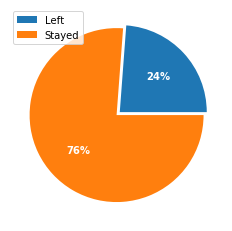

In [14]:
left = len(df[df["left"]==1])
stayed = len(df[df["left"]==0])

values = [left,stayed]
labels = ["Left","Stayed"]
explode = [0.05,0]
fig = plt.figure(figsize = (4,4))
pie = plt.pie(values, labels = labels, explode = explode, autopct = '%.0f%%', textprops={'color':"w", 'fontweight':"bold"})
plt.legend()
fig.savefig("pie_left_stay.png")

## Pairplot

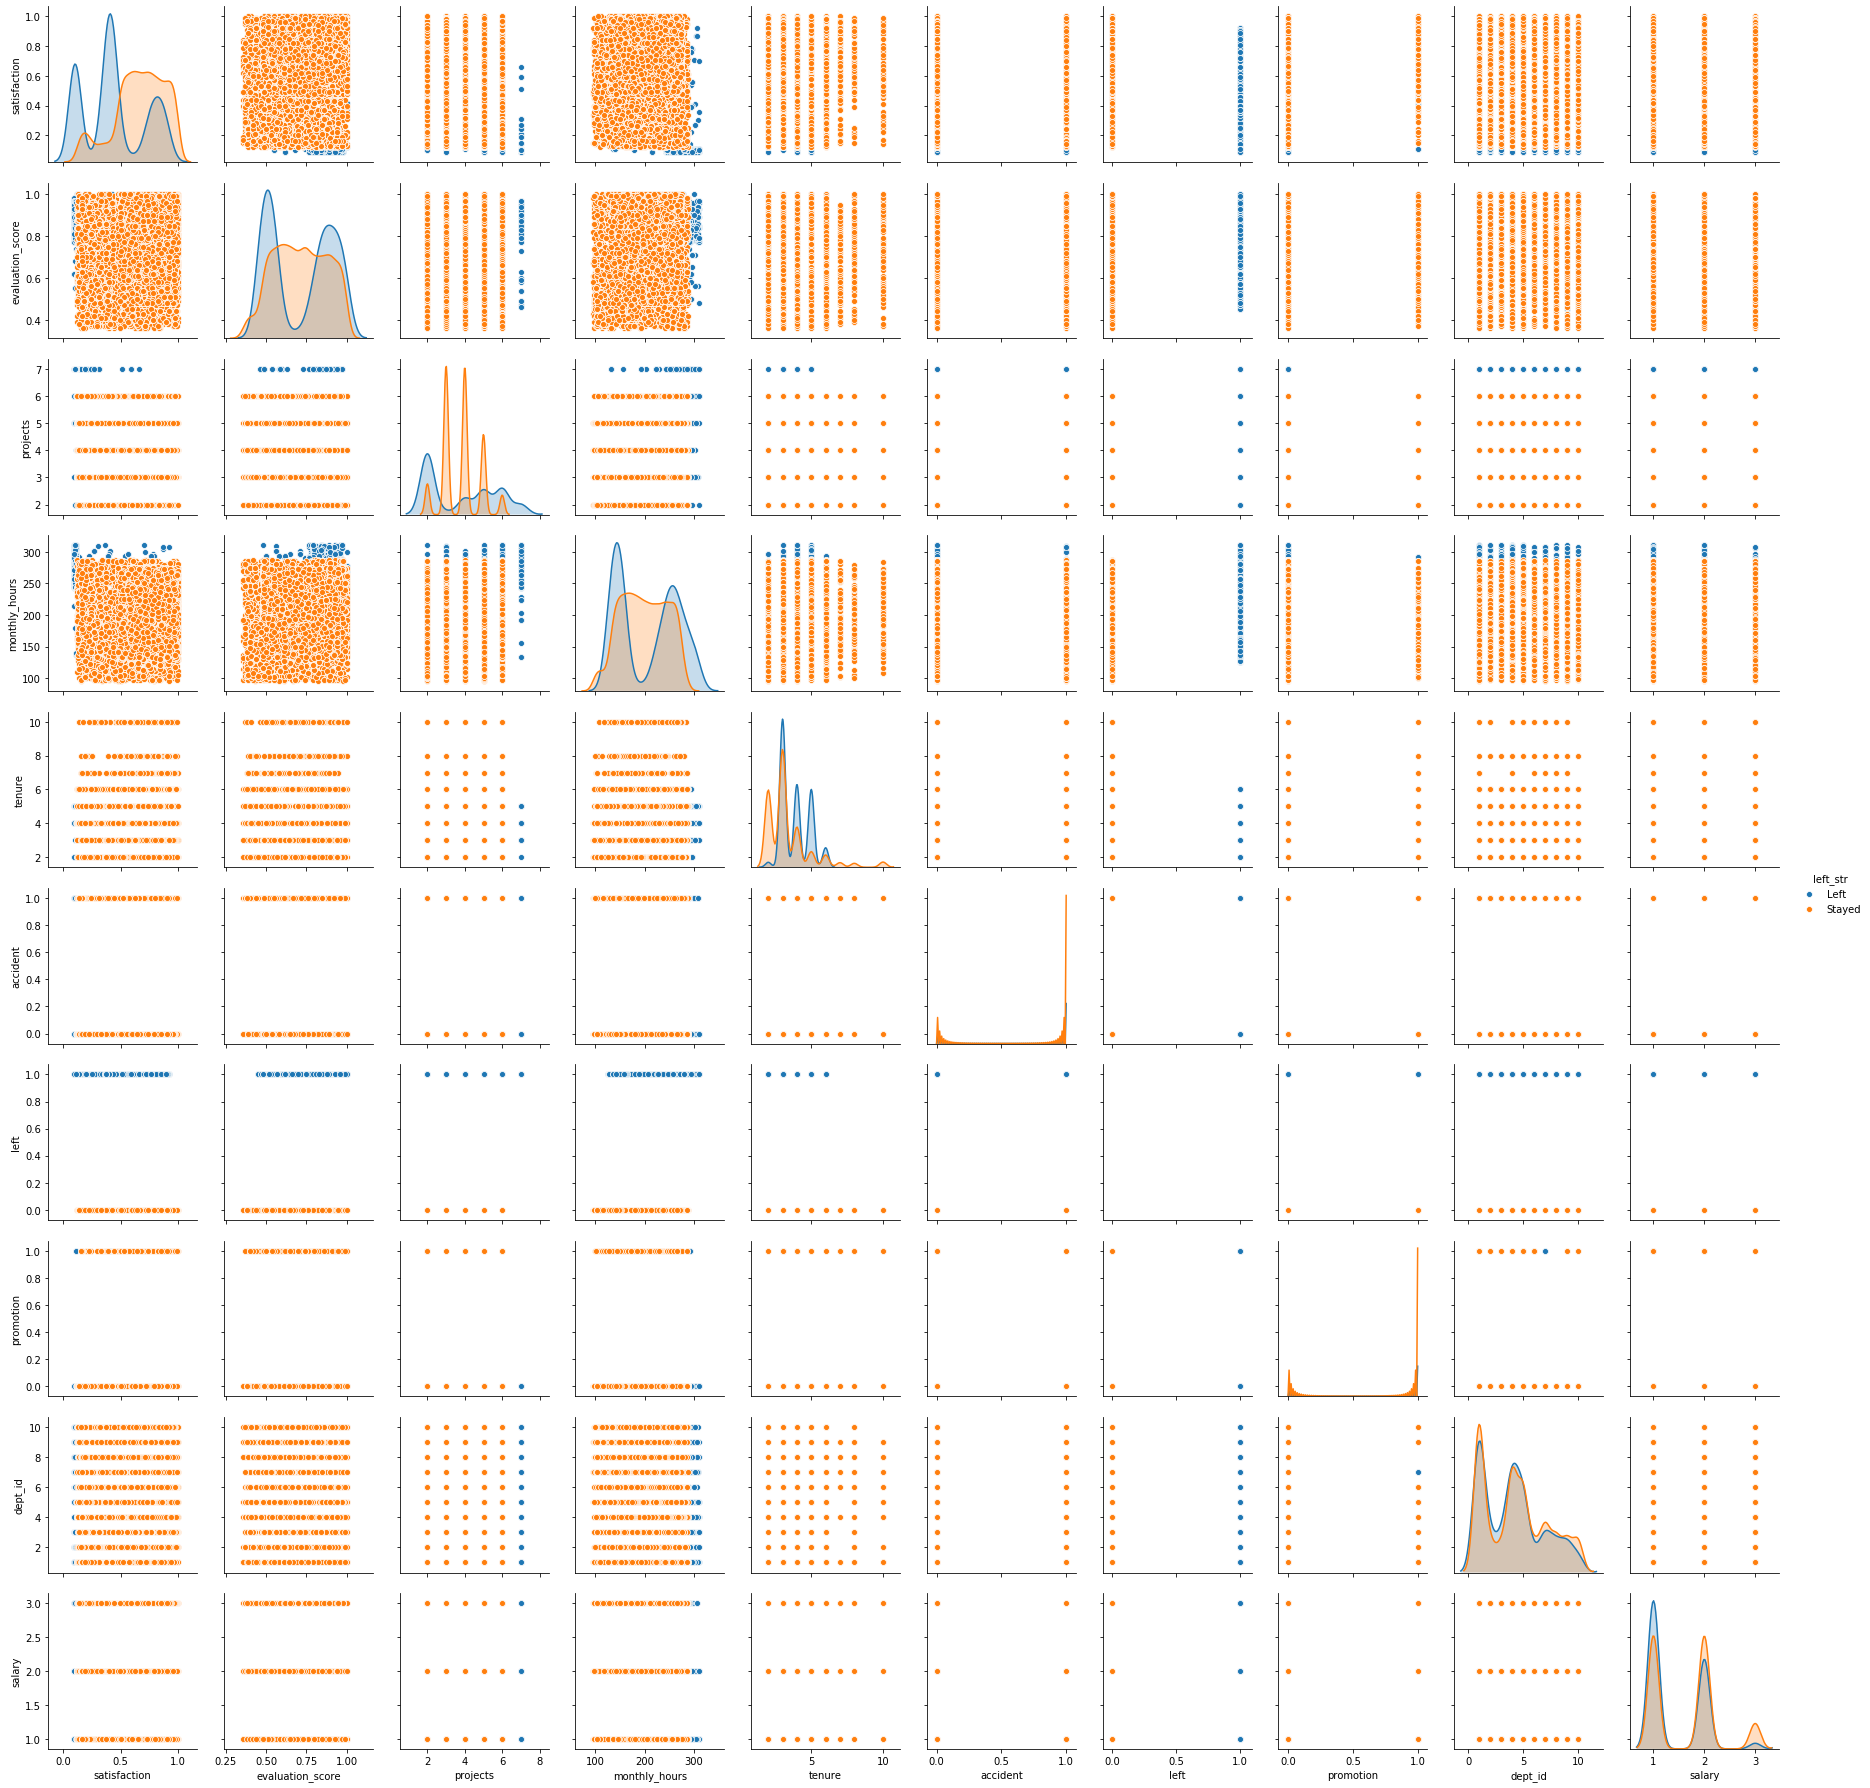

In [15]:
sns_plot=sns.pairplot(df1, hue='left_str')
plt.show()

**Comment:**

Although quite overwhelming the pairplot output can give us an overall idea of the differences between employees that left and those that stayed if we focus on one row at a time. For example, by looking at the first chart on the top row, we can see that the kernel density plot of _satisfaction_ illustrates that the employees that left are more distributed towards the lower end of the satisfaction scale. Let's treat the grid as a matrix for reference purposes and so element (1,3) is the chart on the top row, column 3, which shows that the highest number of projects i.e. 7, seems to be exclusively made up of those employees that left. Looking at chart (1,4) it seems that those employees that left, work the most on average per month and some of those employees who work the most have the lowest satisfaction level. 

We are already starting to build a picture of the differences between those employees that left and those who stayed. Let's continue with the investigation!

<a id='correlation_agg'></a>

## Correlation Analysis

In [16]:
df1=df1[['left','satisfaction', 'evaluation_score', 'projects', 'monthly_hours', 
         'tenure', 'accident', 'promotion', 'department', 'salary_cat', 'salary', 
         'dept_id', 'left_str']]

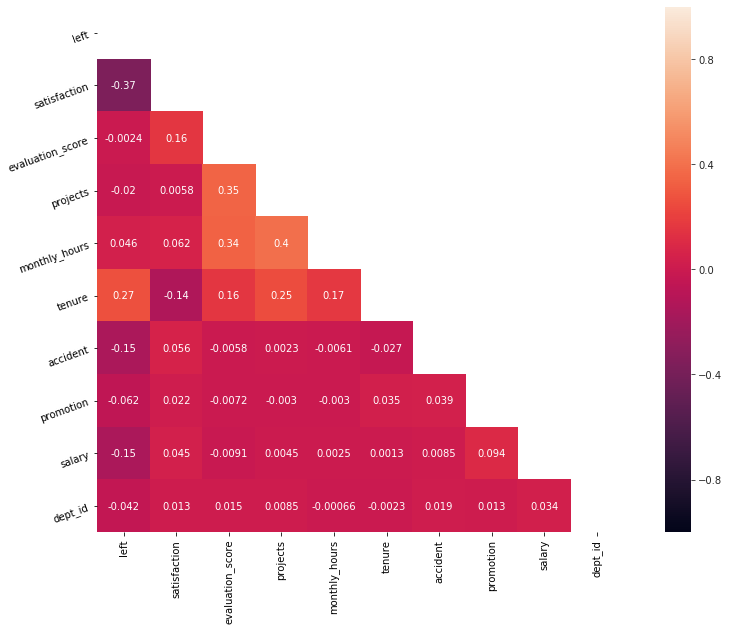

In [17]:
# correlation matrix
corrmat = df1.corr(method='spearman')
# masked correlation heatmap
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot=True, mask=mask);
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=20, fontsize=10)
# pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()
f.savefig("Masked Correlation Heatmap_agg_spear.png")

In [18]:
# use correlation matrix above, which uses Spearman's, just focussing on left variable
corr_list = pd.DataFrame(corrmat['left'].sort_values().drop('left'))
# use Pearson's
corrmat2 = df1.corr(method='pearson')
# just focus on our target variable
corr_list2 = pd.DataFrame(corrmat2['left'].sort_values().drop('left'))
corr_list.join(corr_list2, lsuffix='_spearman', rsuffix='_pearson')

,left_spearman,left_pearson
satisfaction,-0.365842,-0.388375
accident,-0.154622,-0.154622
salary,-0.152266,-0.157898
promotion,-0.061788,-0.061788
dept_id,-0.041697,-0.043814
projects,-0.019544,0.023787
evaluation_score,-0.002440,0.006567
monthly_hours,0.046455,0.071287
tenure,0.268876,0.144822


**Comment:**

We use Spearman's Rho instead of Pearson's correlation coefficient to compute the matrix above; this is because Spearman's rank-based approach is better at capturing non-linear relationships and as we can see from the [pairplot](#Pairplot), our variables do not have clear linear relationships. The table above shows us that the correlation coefficient values for our target variable _left_ and the other variables do not vary substantially between Spearman's and Pearson's anyway.

Looking at the first column, we can see that satisfaction level has the strongest correlation with our target variable _left_ (-0.37). _Number of projects_ has a relatively high positive correlation with _average monthly hours_ (0.4), which makes sense as people who work more hours are likely to complete more projects (assuming each project has similar a timeframe). _Last evaluation_ also has positive correlation with both _number of projects_ and _average monthly hours_ (0.35 and 0.34 respectively); we could infer from this that harder workers get higher evaluation scores.

## Parallel Coordinates

We use the Parallel Coordinates visualizer from the Yellowbrick library, which can be found [here](https://www.scikit-yb.org/en/latest/api/features/pcoords.html).

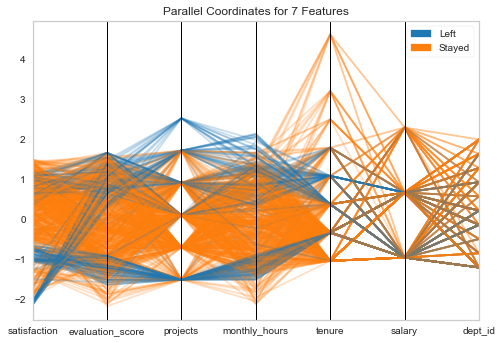

In [19]:
from yellowbrick.features import ParallelCoordinates

fig = plt.figure()

# specify the features of interest and the classes of the target
features = ['satisfaction', 'evaluation_score', 'projects', 'monthly_hours', 'tenure', 'salary', 'dept_id']
classes = ["Stayed", "Left"]

# instantiate the visualizer, we normalise the features so that they are on the same scale
visualizer = ParallelCoordinates(classes=classes, features=features, normalize='standard', colors=('#ff7f0e', '#1f77b4'), sample=0.05, shuffle=True)

# fit and transform the data to the visualizer
visualizer.fit_transform(df1[['satisfaction', 'evaluation_score', 'projects', 'monthly_hours', 'tenure', 'salary', 'dept_id']], df1.left)

# finalise the title and axes then display the visualisation
visualizer.show()
plt.show()
fig.savefig("ParalellCoord.png")

**Comment:**

The Parallel Coordinates plot supports many observations that are shown in the pairplot grid, for example, the distribution of satisfaction levels for those employees that left can be seen in the Parallel Coordinates plot and chart (1,1) in the [pairplot grid](#Pairplot).

Key observations from the Parallel Coordinates plot include: we can see that employees that left are generally either at the top or the bottom of the parallel coordinates plot. Many employees that left the company had a low satisfaction level (c. -2), a high evaluation score (c. 1.5) and some of these employees seem to be overworked looking at _projects_ (c. 2.5) and _monthly hours_ (c. 2). Perhaps, these employees felt like they were overworked compared to other employees and left. We can also see other employees that left with a satisfaction score of around -1 who got low evaluation scores (from -1 to -1.5), worked on a low number of projects (c. -1.5) and worked a low number of monthly hours (c. -1). Perhaps these employees were disengaged with the company and demotivated and therefore left.

In [20]:
df1.groupby('left').mean()

,satisfaction,evaluation_score,projects,monthly_hours,tenure,accident,promotion,salary,dept_id
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945,4.408908
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730,4.118734


## Boxplots

In [21]:
plt.style.use('default') # we do this because the parallel coordinates plot above changes the matplotlib style so we are resetting the style

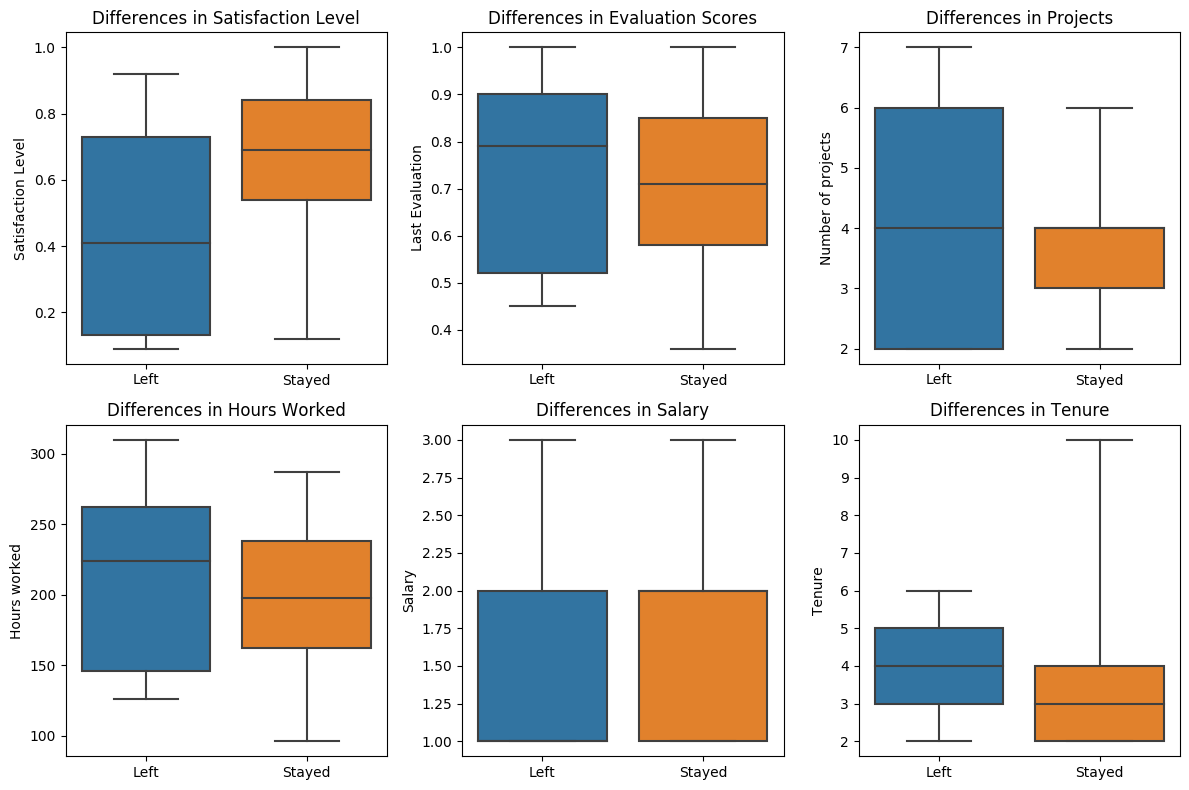

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sns.boxplot(x='left_str', y='satisfaction', whis='range', data=df1)
plt.ylabel("Satisfaction Level")
plt.xlabel("")
plt.title("Differences in Satisfaction Level")

plt.subplot(2,3,2)
sns.boxplot( x='left_str', y='evaluation_score', whis='range', data=df1)
plt.ylabel("Last Evaluation")
plt.xlabel("")
plt.title("Differences in Evaluation Scores")

plt.subplot(2,3,3)
sns.boxplot( x='left_str', y='projects', whis='range', data=df1)
plt.ylabel("Number of projects")
plt.xlabel("")
plt.title("Differences in Projects")

plt.subplot(2,3,4)
sns.boxplot( x='left_str', y='monthly_hours', whis='range', data=df1)
plt.ylabel("Hours worked")
plt.xlabel("")
plt.title("Differences in Hours Worked")

plt.subplot(2,3,5)
sns.boxplot( x='left_str', y='salary', whis='range', data=df1)
plt.ylabel("Salary")
plt.xlabel("")
plt.title("Differences in Salary")

plt.subplot(2,3,6)
sns.boxplot( x='left_str', y='tenure', whis='range', data=df1)
plt.ylabel("Tenure")
plt.xlabel("")
plt.title("Differences in Tenure")

plt.tight_layout()
plt.show()

### Boxplots for Report

We plot three key boxplots below again so that we can use them in the report.

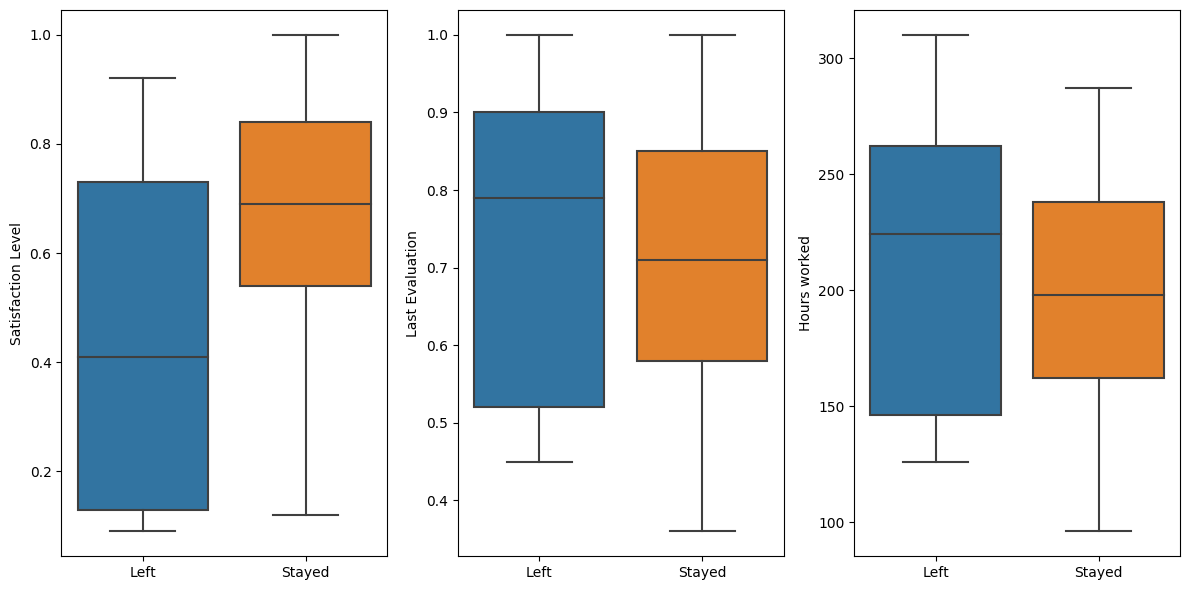

In [23]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
sns.boxplot( x='left_str', y='satisfaction', whis='range', data=df1)
plt.ylabel("Satisfaction Level")
plt.xlabel("")

plt.subplot(1,3,2)
sns.boxplot( x='left_str', y='evaluation_score', whis='range', data=df1)
plt.ylabel("Last Evaluation")
plt.xlabel("")

plt.subplot(1,3,3)
sns.boxplot( x='left_str', y='monthly_hours', whis='range', data=df1)
plt.ylabel("Hours worked")
plt.xlabel("")

plt.tight_layout()
plt.show()
fig.savefig("Boxplots_agg")

**Comment:**

The boxplots suggest that on average those employees who left have a lower satisfaction level and a higher evaluation score than those employees who stayed. Furthermore, it seems that the employees that left worked harder on average than those who stayed, looking at the number of hours worked.

# Step 2: investigate the differences between different performance clusters

## Creating Performance Clusters Based on Interquartile Range (IQR)

In [24]:
df2 = df1.copy(deep=True)

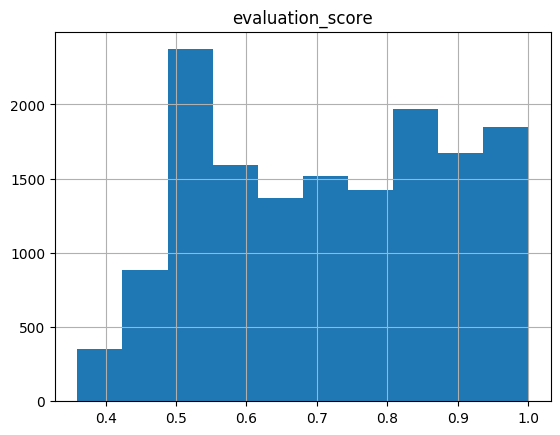

The skew is: -0.03


In [25]:
df2.hist('evaluation_score')
plt.show()
from scipy.stats import skew 
print("The skew is: ""%.2f" % skew(df2.evaluation_score))

**Comment**:

The histogram shows us that the distribution of _evaluation score_ does not have a clear skew, and this is confirmed by calculating the skew which gives us a score of -0.03, indicating that the data is fairly symmetrical as a whole.

In [26]:
last_eval_sum = df2['evaluation_score'].describe()
print(last_eval_sum)

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: evaluation_score, dtype: float64


In [27]:
quartile1 = last_eval_sum["25%"]
quartile2 = last_eval_sum["50%"]
quartile3 = last_eval_sum["75%"]

In [28]:
def eval_label(x):
    if x<=quartile1:
        return 'low'
    elif x<=quartile2:
        return 'medium'
    elif x<=quartile3:
        return 'high'
    else:
        return 'very high'
    
df2['eval_label'] = df2['evaluation_score'].apply(lambda x: eval_label(x))
df2.head()

,left,satisfaction,evaluation_score,projects,monthly_hours,tenure,accident,promotion,department,salary_cat,salary,dept_id,left_str,eval_label
0,1,0.38,0.53,2,157,3,0,0,sales,low,1,1,Left,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium,2,1,Left,high
2,1,0.11,0.88,7,272,4,0,0,sales,medium,2,1,Left,very high
3,1,0.72,0.87,5,223,5,0,0,sales,low,1,1,Left,high
4,1,0.37,0.52,2,159,3,0,0,sales,low,1,1,Left,low


In [29]:
df2_group = df2[['eval_label','left_str','left']].groupby(['eval_label','left_str']).count().reset_index()

In [30]:
df2_group

,eval_label,left_str,left
0,high,Left,788
1,high,Stayed,3088
2,low,Left,1471
3,low,Stayed,2458
4,medium,Left,210
5,medium,Stayed,3465
6,very high,Left,1102
7,very high,Stayed,2417


In [31]:
low_total = df2_group.loc[(df2_group['eval_label'] == 'low'), 'left'].sum()
med_total = df2_group.loc[(df2_group['eval_label'] == 'medium'), 'left'].sum()
high_total = df2_group.loc[(df2_group['eval_label'] == 'high'), 'left'].sum()
vhigh_total = df2_group.loc[(df2_group['eval_label'] == 'very high'), 'left'].sum()

low_left=df2_group.loc[(df2_group['eval_label'] == 'low') & (df2_group['left_str'] == 'Left'), 'left'].sum()
low_leftp= low_left/low_total*100
low_stayed=df2_group.loc[(df2_group['eval_label'] == 'low') & (df2_group['left_str'] == 'Stayed'), 'left'].sum()
low_stayedp= low_stayed/low_total*100
med_left=df2_group.loc[(df2_group['eval_label'] == 'medium') & (df2_group['left_str'] == 'Left'), 'left'].sum()
med_leftp= med_left/med_total*100
med_stayed=df2_group.loc[(df2_group['eval_label'] == 'medium') & (df2_group['left_str'] == 'Stayed'), 'left'].sum()
med_stayedp=med_stayed/med_total*100
high_left=df2_group.loc[(df2_group['eval_label'] == 'high') & (df2_group['left_str'] == 'Left'), 'left'].sum()
high_leftp=high_left/high_total*100
high_stayed=df2_group.loc[(df2_group['eval_label'] == 'high') & (df2_group['left_str'] == 'Stayed'), 'left'].sum()
high_stayedp=high_stayed/high_total*100
vhigh_left=df2_group.loc[(df2_group['eval_label'] == 'very high') & (df2_group['left_str'] == 'Left'), 'left'].sum()
vhigh_leftp=vhigh_left/vhigh_total*100
vhigh_stayed=df2_group.loc[(df2_group['eval_label'] == 'very high') & (df2_group['left_str'] == 'Stayed'), 'left'].sum()
vhigh_stayedp=vhigh_stayed/vhigh_total*100

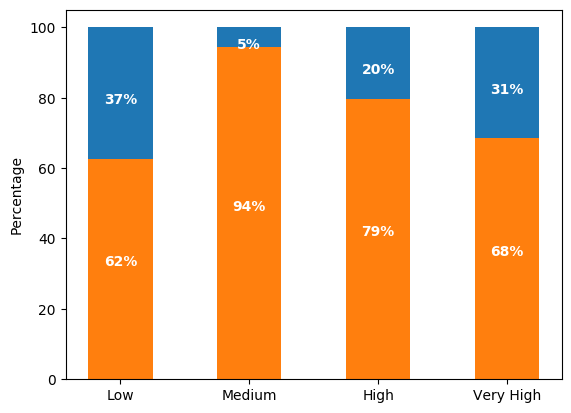

In [32]:
import numpy as np
import matplotlib.pyplot as plt

stayed = [low_stayedp, med_stayedp, high_stayedp, vhigh_stayedp]
left = [low_leftp, med_leftp, high_leftp, vhigh_leftp]

fig = plt.figure(facecolor="white")

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
bar_l = np.arange(1, 5)
tick_pos = [i + (bar_width / 2) for i in bar_l]

ax1 = ax.bar(bar_l, stayed, width=bar_width, label="Stayed", color="C1", align="edge")
ax2 = ax.bar(bar_l, left, bottom=stayed, width=bar_width, label="Left", color="C0", align="edge")
ax.set_ylabel("Percentage")
ax.set_xlabel("")
#ax.legend(loc="upper center")
plt.xticks(tick_pos, ["Low", "Medium", "High", "Very High"])
plt.yticks()

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d%%" % h1, ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d%%" % h2, ha="center", va="top", color="white", fontweight="bold")

plt.show()

**Comment:**

Splitting up the employees into performance quartiles does show a difference in the proportion of employees that left within each group, however, we are going to proceed by just focussing on high vs normal performing employees as it is more important for a company to focus on retaining high performing employees. 

## Investigating High vs Normal Performing Employees

We will define a 'high performer' as those in the 90th percentile or above, equivalent to scoring 0.95 in the last evaluation.

In [33]:
df3 = df1.copy(deep=True)

In [34]:
percentile90 = np.percentile(df3['evaluation_score'], 90)
print(f"The 90th percentile is equivalent to a score of {percentile90} in the last evaluation")

The 90th percentile is equivalent to a score of 0.95 in the last evaluation


In [35]:
# we create a new evaluation label using the 90th percentile score
def eval_label(x):
    if x>=percentile90:
        return 'High'
    else:
        return 'Normal'
    
df3['eval_label'] = df3['evaluation_score'].apply(lambda x: eval_label(x))
df3.head()

,left,satisfaction,evaluation_score,projects,monthly_hours,tenure,accident,promotion,department,salary_cat,salary,dept_id,left_str,eval_label
0,1,0.38,0.53,2,157,3,0,0,sales,low,1,1,Left,Normal
1,1,0.80,0.86,5,262,6,0,0,sales,medium,2,1,Left,Normal
2,1,0.11,0.88,7,272,4,0,0,sales,medium,2,1,Left,Normal
3,1,0.72,0.87,5,223,5,0,0,sales,low,1,1,Left,Normal
4,1,0.37,0.52,2,159,3,0,0,sales,low,1,1,Left,Normal


<a id='pie_performers'></a>

There are 1587 high performers


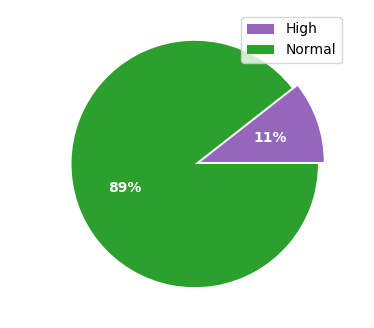

In [36]:
high = len(df3[df3["eval_label"]=='High'])
normal = len(df3[df3["eval_label"]=='Normal'])
print(f"There are {high} high performers")

values = [high,normal]
labels = ["High","Normal"]
explode = [0.05,0]
fig = plt.figure(figsize = (4,4))
pie = plt.pie(values, labels = labels, explode = explode, colors=['C4','C2'], autopct = '%.0f%%', textprops={'color':"w", 'fontweight':"bold"})
plt.legend()
plt.show()
fig.savefig("pie_high_norm.png")

**Comment:**

It seems sensible at this stage to label 11% of employees as high performers, equivalent to 1,587 employees (out of 14,999 total employees).

In [37]:
df4 = df3[['eval_label','left_str','left']].groupby(['eval_label','left_str']).count().reset_index()

In [38]:
df4

,eval_label,left_str,left
0,High,Left,529
1,High,Stayed,1058
2,Normal,Left,3042
3,Normal,Stayed,10370


In [39]:
norm_total = df4.loc[(df4['eval_label'] == 'Normal'), 'left'].sum()
high_total = df4.loc[(df4['eval_label'] == 'High'), 'left'].sum()

norm_left=df4.loc[(df4['eval_label'] == 'Normal') & (df4['left_str'] == 'Left'), 'left'].sum()
norm_leftp= norm_left/norm_total*100
norm_stayed=df4.loc[(df4['eval_label'] == 'Normal') & (df4['left_str'] == 'Stayed'), 'left'].sum()
norm_stayedp=norm_stayed/norm_total*100
high_left=df4.loc[(df4['eval_label'] == 'High') & (df4['left_str'] == 'Left'), 'left'].sum()
high_leftp=high_left/high_total*100
high_stayed=df4.loc[(df4['eval_label'] == 'High') & (df4['left_str'] == 'Stayed'), 'left'].sum()
high_stayedp=high_stayed/high_total*100

529 high performing employees have left the company


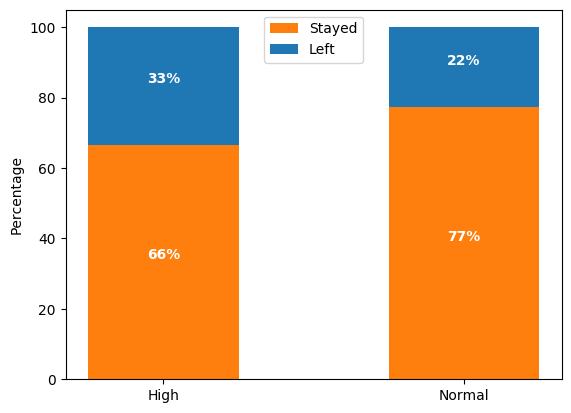

In [40]:
import numpy as np
import matplotlib.pyplot as plt

stayed = [high_stayedp, norm_stayedp]
left = [high_leftp, norm_leftp]
print(f"{high_left} high performing employees have left the company")

fig = plt.figure(facecolor="white")

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
bar_l = np.arange(1, 3)
tick_pos = [i + (bar_width / 2) for i in bar_l]

ax1 = ax.bar(bar_l, stayed, width=bar_width, label="Stayed", color="C1", align="edge")
ax2 = ax.bar(bar_l, left, bottom=stayed, width=bar_width, label="Left", color="C0", align="edge")
ax.set_ylabel("Percentage")
ax.set_xlabel("")
ax.legend(loc="upper center")
plt.xticks(tick_pos, ["High", "Normal"])
plt.yticks()

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d%%" % h1, ha="center", va="bottom", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d%%" % h2, ha="center", va="bottom", color="white", fontweight="bold")

plt.show()
fig.savefig("high_norm_bar.png")

**Comment**: 

A higher proportion of high performing employees have left in the dataset compared to normal performing employees (33% vs 22%). Since it is crucial to companies' success to retain high performing employees, this warrants further analysis.

<a id='correlation_split'></a>

## Correlation Analysis

In [41]:
dfa = df3[(df3['eval_label']=='High')]
dfb = df3[(df3['eval_label']!='High')]
high_corr = dfa.corr(method='spearman').transpose()
norm_corr = dfb.corr(method='spearman').transpose()

### Normal Performers

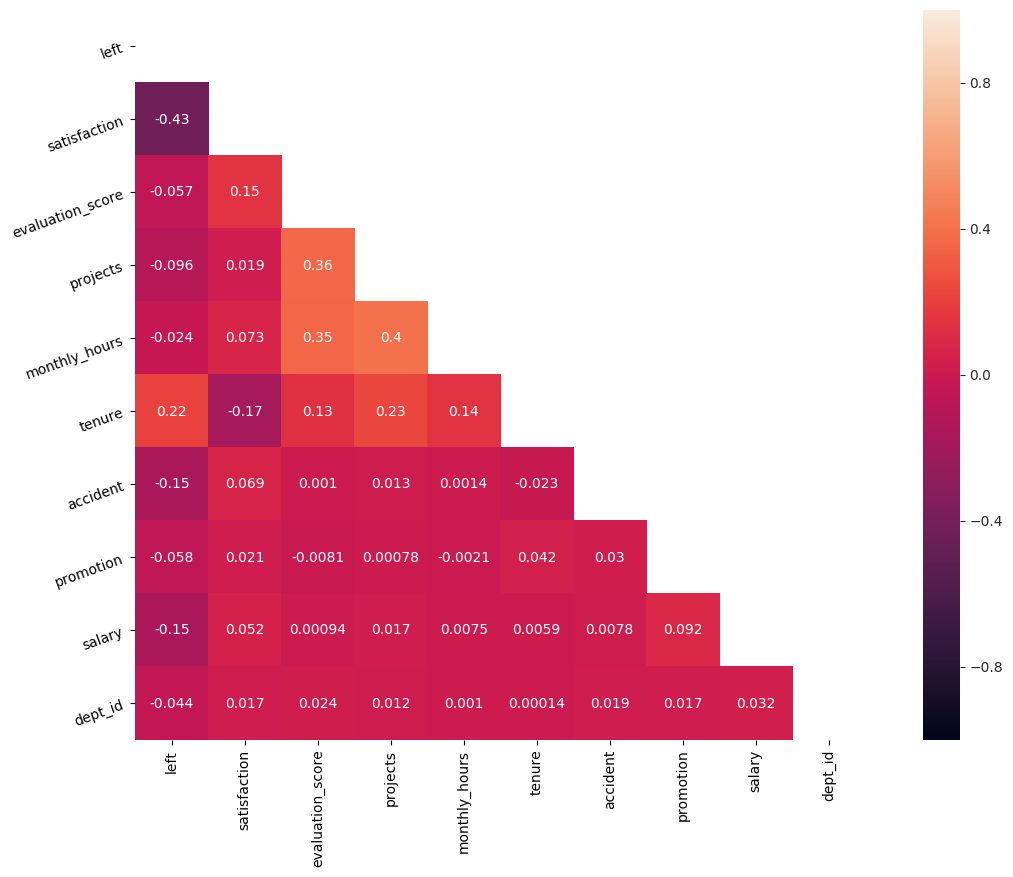

In [42]:
# masked correlation heatmap
mask = np.zeros_like(norm_corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(norm_corr, vmin = -1, vmax = 1, square=True, annot=True, mask=mask);
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=20, fontsize=10)
# pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

**Comment:**

Leaving the company is highly correlated with satisfaction level (-0.43), no other metric is as correlated, which makes sense intuitively as if you are not happy at a company then you would leave. For this group, higher performance reviews is correlated with number of hours worked and projects (0.35, 0.36 respectively). We can see that this correlation matrix is pretty similar to the aggregate correlation matrix [here](#correlation_agg). This makes sense as only 11% of employees are classed as high performers (see [here](#pie_performers)).

### High Performers

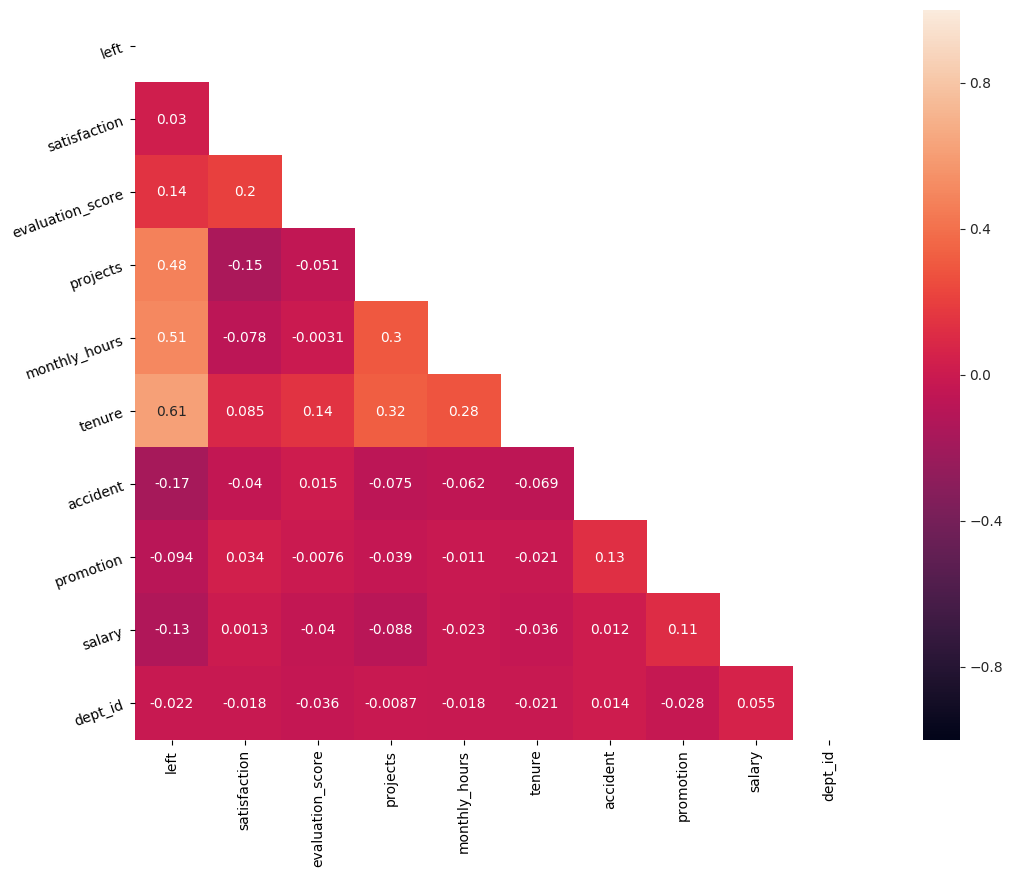

In [43]:
# masked correlation heatmap
mask = np.zeros_like(high_corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
with sns.axes_style("white"):
    ax = sns.heatmap(high_corr, vmin = -1, vmax = 1, square=True, annot=True, mask=mask);
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=20, fontsize=10)
# pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

**Comment:**

Working hours, number of projects and time spent with the company have notable correlations with our target variable _left_ relative to other variables (0.51, 0.48, 0.61 respectively); this suggests that as those 3 variables increase, the likelihood of leaving could increase.

## Performance Clusters
We create performance clusters manually to further explore the left/stay split across different performance groups.

In [44]:
num_columns = (df3._get_numeric_data().columns)

df_cluster = df3
df_cluster['Performance cluster'] = df_cluster['left_str'] + ' & ' + df_cluster['eval_label']

df_pivot = df_cluster.pivot_table(index= (['Performance cluster']), values =num_columns, aggfunc=np.mean)
df_pivot.transpose()

Performance cluster,Left & High,Left & Normal,Stayed & High,Stayed & Normal
accident,0.049149,0.047009,0.172968,0.175217
dept_id,4.190926,4.106180,4.328922,4.417068
evaluation_score,0.978847,0.672771,0.973733,0.689124
left,1.000000,1.000000,0.000000,0.000000
monthly_hours,250.024575,200.010191,200.465974,198.916779
projects,4.943289,3.666338,3.827977,3.782449
promotion,0.001890,0.005917,0.030246,0.025844
salary,1.432892,1.411571,1.615312,1.654581
satisfaction,0.625142,0.407919,0.677694,0.665699
tenure,4.856333,3.706114,3.320416,3.386114


**Comment**:

These performance clusters help us to segment the data further so that we can more easily compare differences between high and normal performing employees. The values that immediately jump out are _monthly hours_, _projects_, and _salary_, so we will explore these features in more depth.

## Exploring Differences in Variables Accross Performance Clusters

In [45]:
df_cluster['Performance cluster'].value_counts()

Stayed & Normal    10370
Left & Normal       3042
Stayed & High       1058
Left & High          529
Name: Performance cluster, dtype: int64

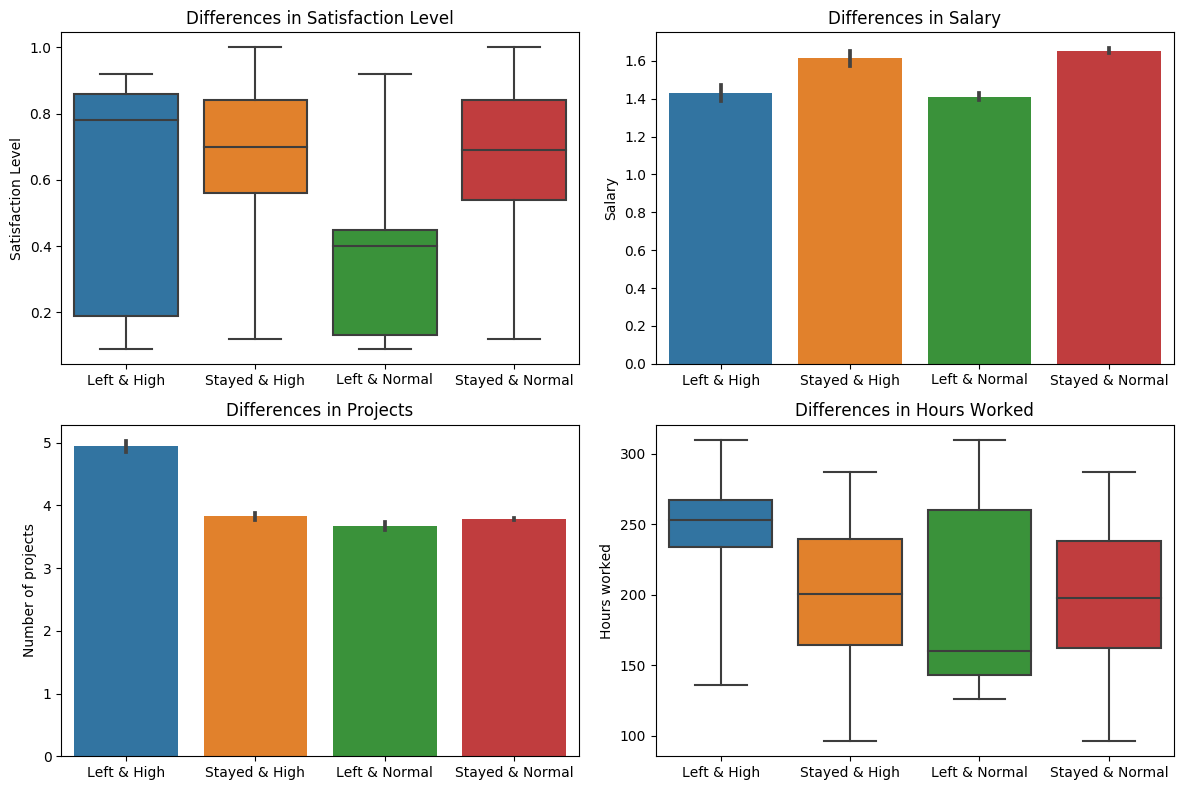

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot( x='Performance cluster', y='satisfaction', order=['Left & High', 'Stayed & High', 'Left & Normal', 'Stayed & Normal'], whis='range', data=df_cluster)
plt.ylabel("Satisfaction Level")
plt.xlabel("")
plt.title("Differences in Satisfaction Level")

plt.subplot(2,2,2)
sns.barplot( x='Performance cluster', y='salary', order=['Left & High', 'Stayed & High', 'Left & Normal', 'Stayed & Normal'], data=df_cluster)
plt.ylabel("Salary")
plt.xlabel("")
plt.title("Differences in Salary")

plt.subplot(2,2,3)
sns.barplot( x='Performance cluster', y='projects', order=['Left & High', 'Stayed & High', 'Left & Normal', 'Stayed & Normal'], data=df_cluster)
plt.ylabel("Number of projects")
plt.xlabel("")
plt.title("Differences in Projects")

plt.subplot(2,2,4)
sns.boxplot( x='Performance cluster', y='monthly_hours', order=['Left & High', 'Stayed & High', 'Left & Normal', 'Stayed & Normal'], whis='range', data=df_cluster)
plt.ylabel("Hours worked")
plt.xlabel("")
plt.title("Differences in Hours Worked")


plt.tight_layout()
plt.show()

**Comment**: 

Working our way anti-clockwise: interestingly the high performers that left had a higher satisfaction level on average than the other groups. However, we can see from [the correlation matrix](#High-Performers) that _satisfaction_ is not correlated with leaving for high performers. The salary bar chart shows the average salary per group and we can see that those employees that stayed have a higher salary on average than those who left. We can see that high performers that left work harder on average: they work on more projects and work more on average by 50 hours per month compared to the other performance clusters.

### Output for Report

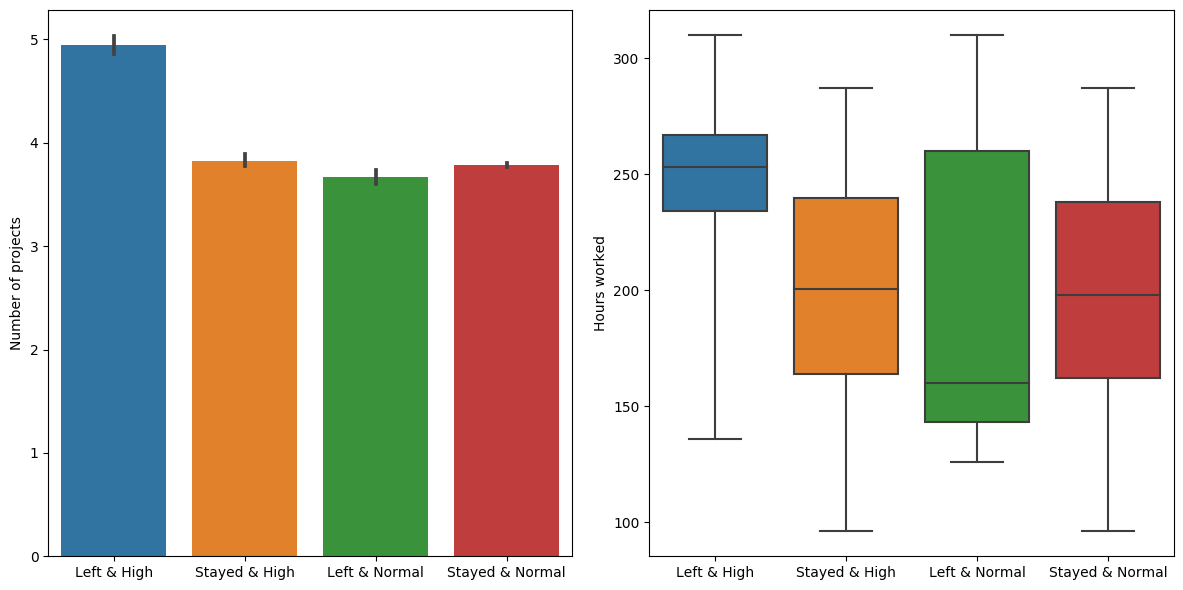

In [47]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot( x='Performance cluster', y='projects', order=['Left & High', 'Stayed & High', 'Left & Normal', 'Stayed & Normal'], data=df_cluster)
plt.ylabel("Number of projects")
plt.xlabel("")
#plt.title("Differences in Projects")

plt.subplot(1,2,2)
sns.boxplot( x='Performance cluster', y='monthly_hours', order=['Left & High', 'Stayed & High', 'Left & Normal', 'Stayed & Normal'], whis='range', data=df_cluster)
plt.ylabel("Hours worked")
plt.xlabel("")
#plt.title("Differences in Hours Worked")

plt.tight_layout()
plt.show()
fig.savefig("cluster_analysis")

## Stacked Bar Chart for Salary Category by Performance Cluster

The barplot of _salary_ above is not that informative and so we thought that it would be helpful to show the salary breakdown for each performance cluster, given that it is a categoric variable.

In [48]:
df_stacked = df_cluster[['Performance cluster','salary_cat', 'salary']].groupby(['Performance cluster', 'salary_cat']).count().reset_index()

In [49]:
df_stacked

,Performance cluster,salary_cat,salary
0,Left & High,high,7
1,Left & High,low,307
2,Left & High,medium,215
3,Left & Normal,high,75
4,Left & Normal,low,1865
5,Left & Normal,medium,1102
6,Stayed & High,high,84
7,Stayed & High,low,491
8,Stayed & High,medium,483
9,Stayed & Normal,high,1071


In [50]:
lh = df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & High'), 'salary'].sum()
ln = df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & Normal'), 'salary'].sum()
sh = df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & High'), 'salary'].sum()
sn = df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & Normal'), 'salary'].sum()

In [51]:
lhh=df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & High') & (df_stacked['salary_cat'] == 'high'), 'salary'].sum()
lhhp= round(lhh/lh*100)
lhl=df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & High') & (df_stacked['salary_cat'] == 'low'), 'salary'].sum()
lhlp= round(lhl/lh*100)
lhm=df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & High') & (df_stacked['salary_cat'] == 'medium'), 'salary'].sum()
lhmp= round(lhm/lh*100)
lnh=df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & Normal') & (df_stacked['salary_cat'] == 'high'), 'salary'].sum()
lnhp= round(lnh/ln*100)
lnl=df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & Normal') & (df_stacked['salary_cat'] == 'low'), 'salary'].sum()
lnlp= round(lnl/ln*100)
lnm=df_stacked.loc[(df_stacked['Performance cluster'] == 'Left & Normal') & (df_stacked['salary_cat'] == 'medium'), 'salary'].sum()
lnmp= round(lnm/ln*100)
shh=df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & High') & (df_stacked['salary_cat'] == 'high'), 'salary'].sum()
shhp= round(shh/sh*100)
shl=df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & High') & (df_stacked['salary_cat'] == 'low'), 'salary'].sum()
shlp= round(shl/sh*100)
shm=df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & High') & (df_stacked['salary_cat'] == 'medium'), 'salary'].sum()
shmp= round(shm/sh*100)
snh=df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & Normal') & (df_stacked['salary_cat'] == 'high'), 'salary'].sum()
snhp= round(snh/sn*100)
snl=df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & Normal') & (df_stacked['salary_cat'] == 'low'), 'salary'].sum()
snlp= round(snl/sn*100)
snm=df_stacked.loc[(df_stacked['Performance cluster'] == 'Stayed & Normal') & (df_stacked['salary_cat'] == 'medium'), 'salary'].sum()
snmp= round(snm/sn*100)

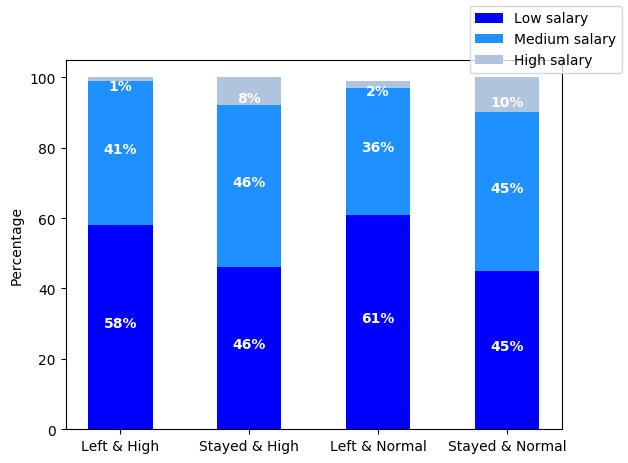

In [52]:
import numpy as np
import matplotlib.pyplot as plt

low_salary = [lhlp, shlp, lnlp, snlp]
med_salary = [lhmp, shmp, lnmp,  snmp]
high_salary = [lhhp,shhp, lnhp,  snhp]

fig = plt.figure(facecolor="white")

ax = fig.add_subplot(1, 1, 1)
bar_width = 0.5
bar_l = np.arange(1, 5)
tick_pos = [i + (bar_width / 2) for i in bar_l]

ax1 = ax.bar(bar_l, low_salary, width=bar_width,label="Low salary", align="edge", color='blue')
ax2 = ax.bar(bar_l, med_salary, width=bar_width, bottom=low_salary,label="Medium salary", align="edge", color='dodgerblue')
ax3 = ax.bar(bar_l, high_salary, width=bar_width, bottom=np.array(low_salary)+np.array(med_salary), label="High salary", align="edge", color='lightsteelblue')
ax.set_ylabel("Percentage")
ax.set_xlabel("")
fig.legend()
plt.xticks(tick_pos, ["Left & High", "Stayed & High", "Left & Normal", "Stayed & Normal"])
plt.yticks()

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d%%" % h1, ha="center", color="white", fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d%%" % h2, ha="center",color="white", fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., "%d%%" % h3, ha="center", va='top', color="white", fontweight="bold")
plt.show()
fig.savefig("stacked_cluster")

**Comment:**

The bar chart shows us that a high percentage of those who left the company fell into the low salary category (58% and 61%). Out of those employees that stayed, a higher proportion were in the high salary category (8% and 10%).

## Summary of High Performers
1. High performers that are leaving seem to be overworked: shown by them working more than 50 hours on average compared to other performance clusters and _monthly hours_ is positively correlated with leaving for high performers (0.51).
2. They are working on more projects than other employees and only 1% of them are in the "high salary" bracket. 
3. _Tenure_ at the company seems to be relatively highly correlated with leaving the company (0.61).

**N.B.** 
1. It is important to note that the analysis of high performers relies on the _evaluation score_ being reliable ([this article](https://www.yourerc.com/blog/post/the-5-most-common-pitfalls-of-performance-reviews) outlines some common pitfalls of performance reviews); the analysis assumes that the evaluation scores are accurate and those with a high evaluation score are indeed high performers. One way to test the reliability of the scores in reality would be to see how they change for each employee over time and investigate any significant changes.
2. We are defining a high performer as an employee with an _evaluation score_ of 0.95 or above for the purposes of this analysis, whereas, the company may have its own internal definition of what a high performer is.

# Step 3: investigate the differences between departments

<a id='diff_departments'></a>

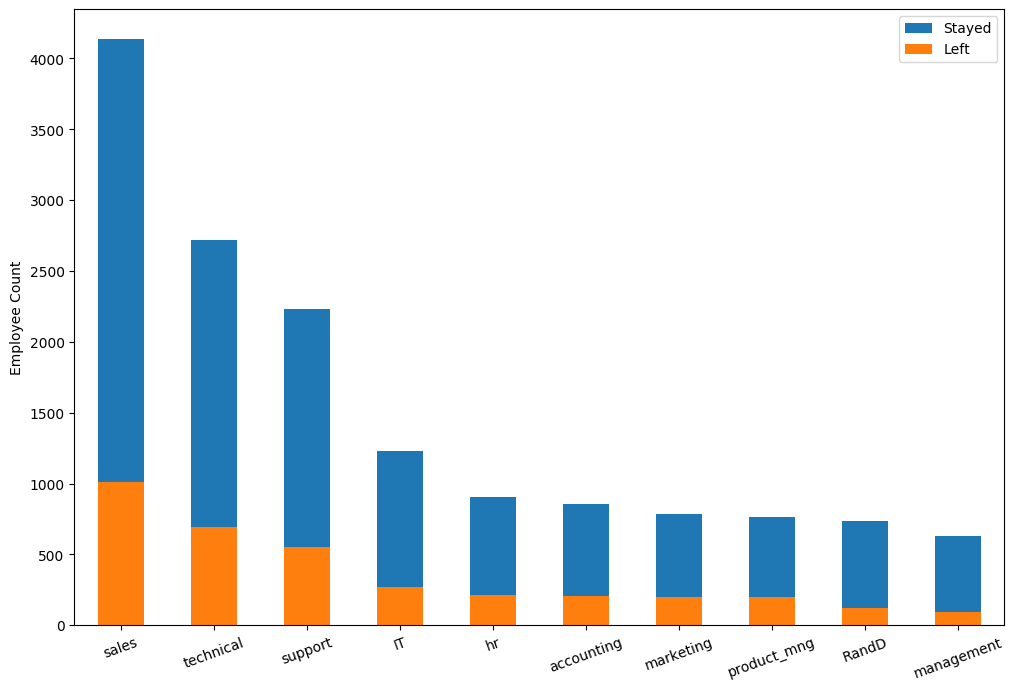

Number of employees in each department: sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
Number of employees that left in each department: sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64


In [53]:
left_data = df_cluster[df_cluster.left == 1]
f, ax = plt.subplots(figsize=(12, 8))
df_cluster.department.value_counts().plot(kind='bar', color='C0')
left_data.department.value_counts().plot(kind='bar', color='C1')
plt.title =('Share of Employees that Left by Department')
plt.ylabel('Employee Count')
plt.xticks(rotation=20)
plt.legend({'Stayed':'C0', 'Left':'C1'})
plt.show()
print(f"Number of employees in each department: {df_cluster.department.value_counts()}")
print(f"Number of employees that left in each department: {left_data.department.value_counts()}")

<a id='percentage_departments'></a>

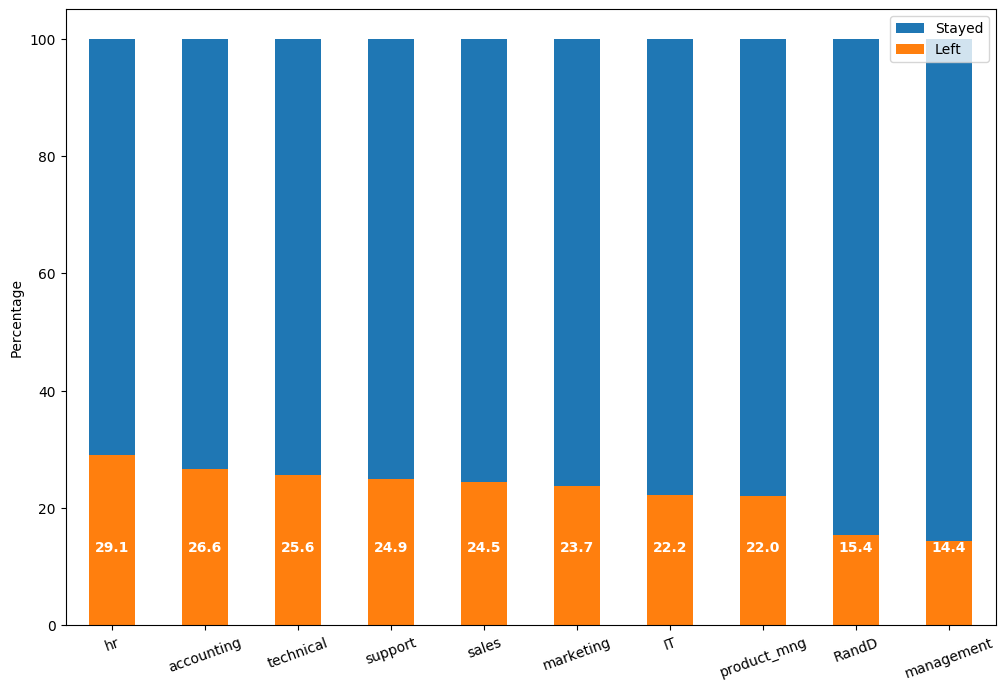

Percentage of employees that left by department 

 hr             29.09
accounting     26.60
technical      25.62
support        24.90
sales          24.49
marketing      23.66
IT             22.25
product_mng    21.95
RandD          15.37
management     14.44
Name: department, dtype: float64


In [54]:
percent_left = round(left_data.department.value_counts()/ df_cluster.department.value_counts() * 100, 2)
percent_stayed = round(df_cluster.department.value_counts()/ df_cluster.department.value_counts() * 100, 2)

f, ax = plt.subplots(figsize=(12,8))
percent_stayed.plot(kind='bar')
percent_left.sort_values(ascending=False).plot(kind='bar', color='C1')
plt.ylabel('Percentage')
plt.xticks(rotation=20)

for rec, label in zip(ax.patches,percent_left.sort_values(ascending=False).round(1).astype(str)):
    height = rec.get_height()/8
    ax.text(rec.get_x() + rec.get_width() / 2, height + .05, label, color="white", ha = 'center', fontweight="bold")
    
plt.legend({'Stayed':'C0', 'Left':'C1'})
plt.show()
f.savefig("depart_stay_leave.png")
print('Percentage of employees that left by department \n\n', percent_left.sort_values(ascending = False))

**Comment:**

In absolute values, employees in _Sales_, _Technical_ and _Support_ departments left more than the other departments (1,014, 697, 555 respectively). In relative terms, _HR_ and _Accounting_ have the highest proportion of employees that left (29.1%, 26.6% respectively) while _Product Management_, _R&D_ and _Management_ have the lowest proportions (22.0%, 15.4%, 14.4% respectively).

In [55]:
dept_mean_data = df_cluster.groupby(['department']).mean()
dept_mean_data

,left,satisfaction,evaluation_score,projects,monthly_hours,tenure,accident,promotion,salary,dept_id
department,,,,,,,,,,
IT,0.222494,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.002445,1.571312,7.0
RandD,0.153748,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307,1.602287,10.0
accounting,0.265971,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253,1.629726,2.0
hr,0.290934,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298,1.607578,3.0
management,0.144444,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524,2.071429,6.0
marketing,0.236597,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117,1.624709,9.0
product_mng,0.219512,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000,1.575388,8.0
sales,0.244928,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155,1.557971,1.0
support,0.248991,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.008973,1.549125,5.0


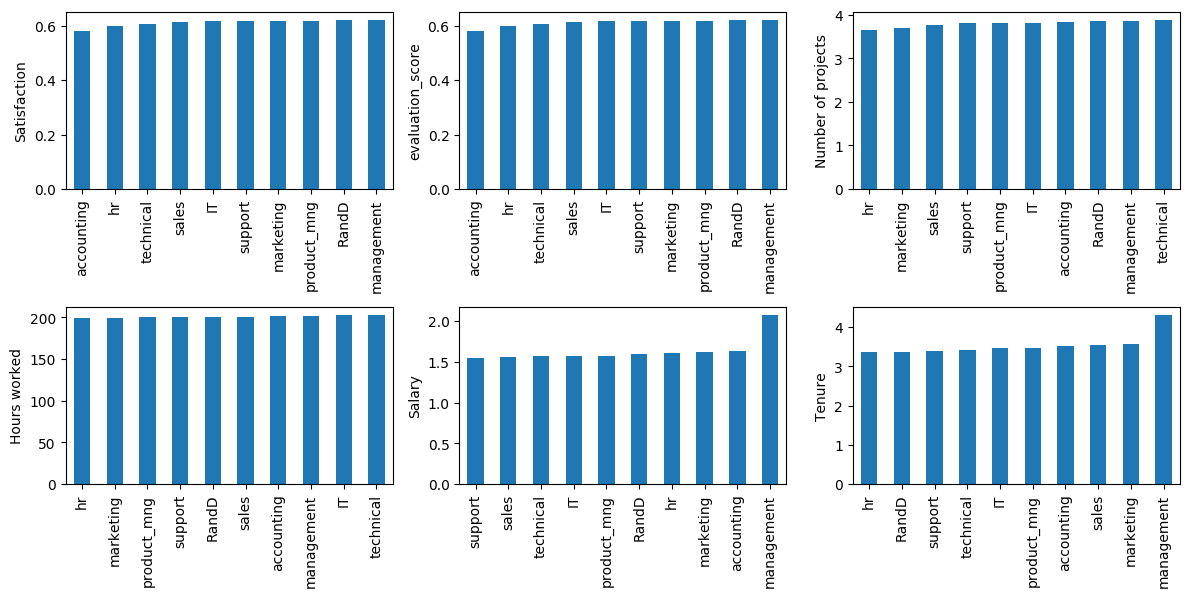

In [56]:
plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
dept_mean_data['satisfaction'].sort_values().plot(kind='bar')
plt.ylabel("Satisfaction")
plt.xlabel("")

plt.subplot(3,3,2)
dept_mean_data['satisfaction'].sort_values().plot(kind='bar')
plt.ylabel("evaluation_score")
plt.xlabel("")

plt.subplot(3,3,3)
dept_mean_data['projects'].sort_values().plot(kind='bar')
plt.ylabel("Number of projects")
plt.xlabel("")

plt.subplot(3,3,4)
dept_mean_data['monthly_hours'].sort_values().plot(kind='bar')
plt.ylabel("Hours worked")
plt.xlabel("")

plt.subplot(3,3,5)
dept_mean_data['salary'].sort_values().plot(kind='bar')
plt.ylabel("Salary")
plt.xlabel("")

plt.subplot(3,3,6)
dept_mean_data['tenure'].sort_values().plot(kind='bar')
plt.ylabel("Tenure")
plt.xlabel("")

plt.tight_layout()
plt.show()

**Comment:**

**Departments with a low proportion of employees leaving** <br>
Plotting the average values for variables across departments allows us to gain an insight into why some departments have more employees that left proportionately than others. The _management_ department has the lowest proportion of employees that left (14%): we can see that on average, the _management_ department has the highest salary (2.07), highest satisfaction level (0.62) and highest evaluation score (0.72). Intuitively, this makes sense as in general you would expect the employees in _management_ to be the top performing employees and earn the most and this leads to a lower propensity to leave the company. The _R&D_ department have the second lowest proportion of employees that left (15%) and we can see that they have the second highest satisfaction score (0.62) and evaluation score (0.71), which may explain the low percentage of employees leaving. 


**Departments with a high proportion of employees leaving** <br>
The _HR_ department has the highest proportion of employees leaving (29%), this may be because on average the department has the second lowest satisfaction score (0.60). The _accounting_ department also has a high proportion of employees leaving (27%) and we can see that it has on average the lowest satisfaction (0.58).

It is important to note that we cannot imply causality between the features and leaving at this stage, but we can start to understand how the experiences of employees in different departments may vary.

## Investigating the Normal/High Performing Split Varies Accross Departments

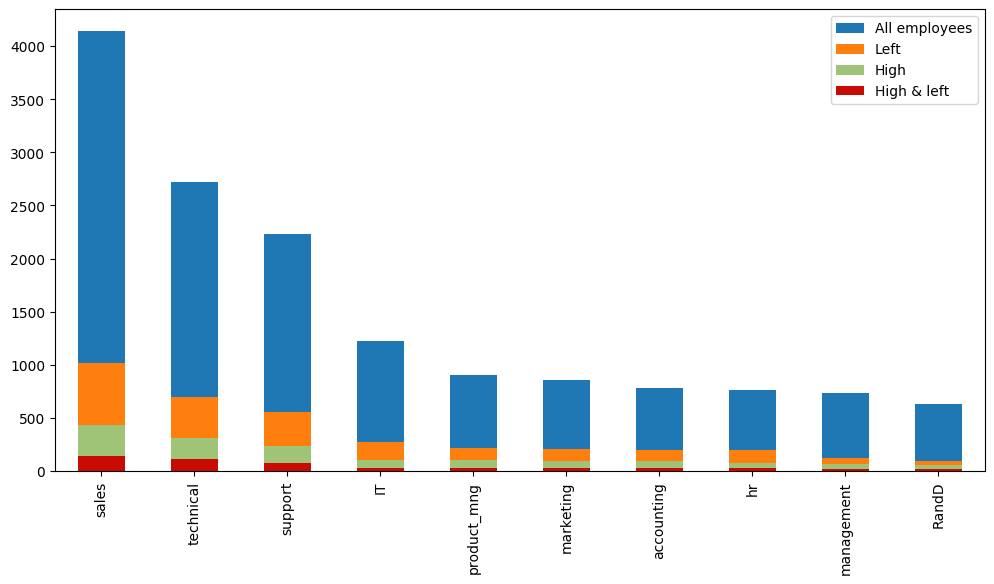

In [57]:
f, ax = plt.subplots(figsize=(12,6))
# all employees
df_cluster.department.value_counts().plot(kind='bar', color='C0')
# employees that left
left_data.department.value_counts().plot(kind='bar', color = 'C1')
# high performing employees
df_cluster[df_cluster['eval_label']=='High'].department.value_counts().plot(kind='bar', color='g')
# high performing employees that left
df_cluster[(df_cluster['eval_label']=='High')&(df_cluster['left_str']=='Left')].department.value_counts().plot(kind='bar', color='r')

plt.legend({'All employees':'b', 'Left' :'k','High':'g', 'High & left':'r'})
plt.show()

This is the same bar chart as [this chart above](#diff_departments) with the employees that left category broken up into "High" and "High & Left". It is not hugely insightful to look at just the absolute numbers and so we will look at the relative values for each department.

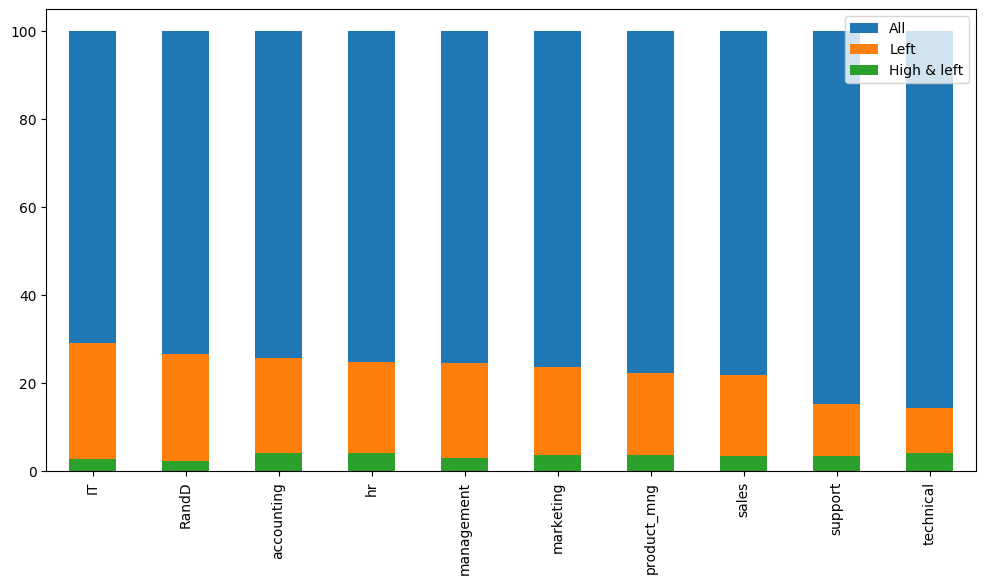

IT             2.69
RandD          2.41
accounting     4.04
hr             4.06
management     3.02
marketing      3.73
product_mng    3.66
sales          3.43
support        3.41
technical      4.19
Name: department, dtype: float64


In [58]:
percent_left = round(left_data.department.value_counts()/ df_cluster.department.value_counts() * 100, 2)
percent_all = round(df_cluster.department.value_counts()/ df_cluster.department.value_counts() * 100, 2)
#percent_high = round(df_cluster[(df_cluster['eval_label']=='High')].department.value_counts()/df_cluster.department.value_counts()*100,2)
percent_high_left = round(df_cluster[(df_cluster['eval_label']=='High')&(df_cluster['left_str']=='Left')].department.value_counts()/df_cluster.department.value_counts()*100,2)

f, ax = plt.subplots(figsize=(12,6))
# all employees
percent_all.plot(kind='bar', color='C0')
# employees that left
percent_left.sort_values(ascending=False).plot(kind='bar', color='C1')
# high performing employees that left
percent_high_left.plot(kind='bar', color='C2')

plt.legend({'All': 'C0','Left' :'C1','High & left':'C2'})
plt.show()
print(percent_high_left)

This is the same chart as [this chart above](#percentage_departments) with the percentage of employees that left broken down into "High & Left" employees. Due to the fact that the percentage of "High & Left" is low for each column, we cannot really see the differences between the departments and so we will further investigate the normal/high split by looking at just the employees that left for each department.

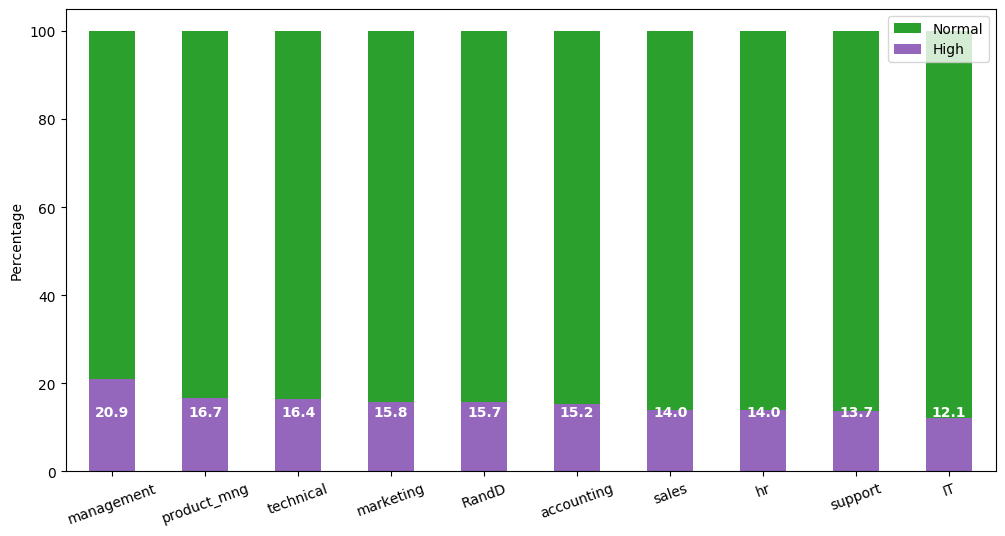

In [59]:
percent_norm = round(left_data.department.value_counts()/ left_data.department.value_counts() * 100, 2)
percent_high = round(df_cluster[(df_cluster['eval_label']=='High')&(df_cluster['left_str']=='Left')].department.value_counts()/left_data.department.value_counts()*100,2)

x = np.arange(len(percent_norm))  # the label locations
width = 0.35  # the width of the bars

f, ax = plt.subplots(figsize=(12,6))
percent_norm.plot(kind='bar', color='C2')
percent_high.sort_values(ascending=False).plot(kind='bar', color = 'C4')

for rec, label in zip(ax.patches,percent_high.sort_values(ascending=False).round(1).astype(str)):
    height = rec.get_height()/8
    ax.text(rec.get_x() + rec.get_width() / 2, height + .05, label, color="white", ha = 'center', fontweight="bold")

plt.ylabel('Percentage')
plt.xticks(rotation=20)

plt.legend({'Normal': 'C2','High' :'C4'})
plt.show()
f.savefig("depart_left_split.png")

**Comment:**

This bar chart is more helpful than previous charts in allowing us to visualise the high/normal split out of those employees that left for each department. We can see that _management_ have the highest proportion of high performing employees that left (21%), however, _management_ do have the smallest department (630) and the lowest turnover rate (14%) and so the 21% is not really a cause for concern. The other departments have a fairly similar split so we can conclude that high performing employee attrition is not really a departmental issue.

# Step 4: build a predictive model

<a id='Preprocessing2'></a>

## Preprocessing
We need to preprocess our data before implementing a Machine Learning model.

In [60]:
mod1 = df.copy(deep=True)

In [61]:
mod1 = mod1.rename(columns = {'department': 'dept'})

In [62]:
cat_vars=['dept','salary_cat']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(mod1[var], prefix=var)
    mod=mod1.join(cat_list)
    mod1=mod

In [63]:
mod1.head()

,satisfaction,evaluation_score,projects,monthly_hours,tenure,accident,left,promotion,dept,salary_cat,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_cat_high,salary_cat_low,salary_cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [64]:
mod1.drop(mod1.columns[[8, 9]], axis=1, inplace=True)

In [65]:
cols = mod1.columns
cols = cols.drop("left")
X = mod1[cols]
y = mod1["left"]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Random Forest Model
We will implement a Random Forest Classifier to explore the most important features for predicting whether an employee will leave. Intuitively we think that using a Random Forest is suitable for our classification problem as it uses Decision Trees which should reflect an employees decision to leave. The Decision Tree approach creates rules based on features then uses the rules to decide whether an employee will leave or not. The Random Forest algorithm combines many different, randomly created Decision Trees and chooses the most popular outcome of the Decision Trees (also known as majority voting), in our case this is whether an employee will leave or not based on their characteristics.

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Accuracy: 0.988


<a id='Cross-Validation2'></a>

## Cross Validation

In [69]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.987


**Comment**:

The average accuracy is very close to the initial Random Forest model accuracy (0.987 vs 0.988), hence, we can conclude that the model generalises well.

## Predicting Test Cases

In [70]:
predictions = pd.DataFrame( { 'actual':  y_test, 'predicted': y_pred} )

In [71]:
predictions = predictions.reset_index()
predictions.head()

,index,actual,predicted
0,1670,1,1
1,13378,0,0
2,10233,0,0
3,4719,0,0
4,7003,0,0


In [72]:
predictions[predictions['actual']!= predictions['predicted']].count()

index        52
actual       52
predicted    52
dtype: int64

**Comment:**

We can see that the model mislabels 52 employees.

## Confusion Matrix
We construct a confusion matrix to visualise predictions made by a classifier and evaluate the accuracy of a classification.

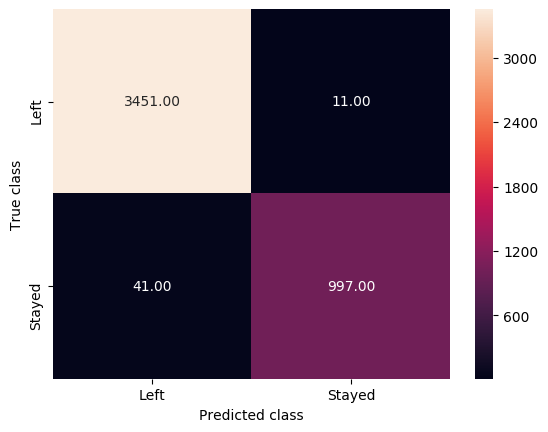

In [73]:
from sklearn.metrics import confusion_matrix
forest_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3462
           1       0.99      0.96      0.97      1038

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



### ROC Curve
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

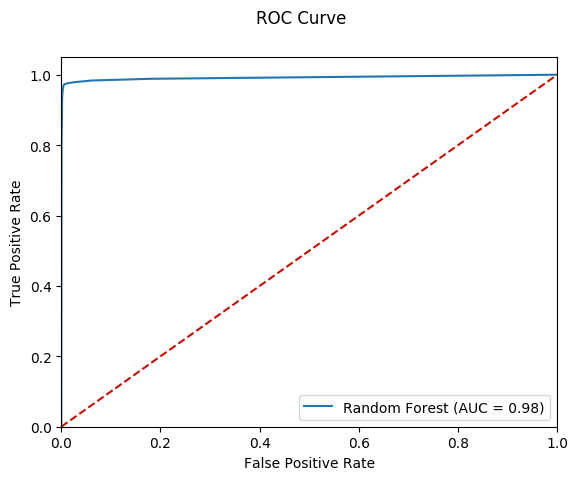

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_test, y_pred)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.suptitle('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Comment:**

We have a class imbalance issue as 24% of employees left compared to 76% that stayed ([see here](#Aggregate-Left/Stayed-Split)) and, therefore, it is better to look at precision and recall than the accuracy score. Looking at the confusion matrix, our model incorrectly labelled 52 employees: predicting 11 employees that stayed who actually left and 41 employees that left who actually stayed. However, as a whole our model performs exceptionally well achieving very high precision and recall scores (0.99 and 0.99 respectively). Furthermore, the ROC curve above shows that the Random Forest model has a AUC score of nearly 1, which means that it has a good measure of separability.

We can say with some certainty, therefore, that our model "understands" the data well and so we can be confident that the features that it assigns a higher importance to are the key features in explaining why employees leave.

<a id='Feature-Importance-for-Random-Forest-Model2'></a>

## Feature Importance for Random Forest Model
Feature importance ranks the features according to how much they improve the model fit on average across the trees. It is the ratio between the number of samples routed to a decision node involving that feature in any of the trees of the ensemble over the total number of samples in the training set. Features that are involved in the top level nodes of the decision trees tend to see more samples hence are likely to have more importance.

In [76]:
indices = np.argsort(rf.feature_importances_)[::-1]

In [77]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rf.feature_importances_[indices[f]]]

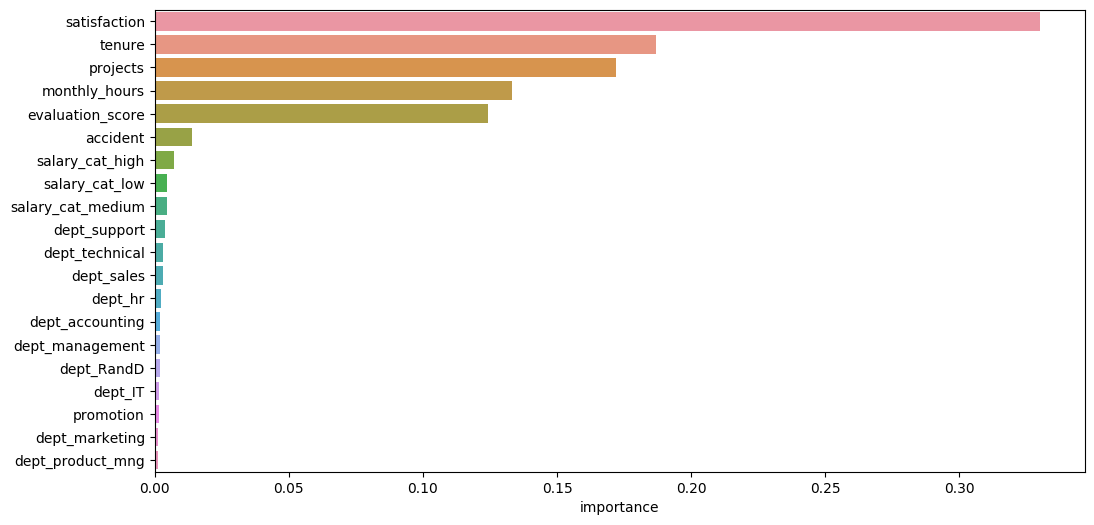

In [78]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.ylabel("")
plt.show()
f.savefig('feature_imp.png')

**Comment:**

We can see that _satisfaction_ is clearly the most important feature to our model, followed by _tenure_, _projects_ and _monthly hours_. Salary does not seem to be that important and what department employees are in does not seem to be important either compared to the most important features. This reflects our initial [correlation analysis](#correlation_agg), where _satisfaction_ has the strongest correlation with the _left_ target variable. Relating these results to our correlation analysis in [Step 2](#correlation_split), the feature importance chart highlights the same key variables i.e. _satisfaction_ had a high negative correlation (-0.43) with leaving for normal performing employees and _tenure_,  _projects_ and _monthly hours_ had a relatively strong positive correlation (0.61, 0.48, 0.51 respectively) with leaving for high performing employees and so it reconfirms that these are the key variables to look at in order to manage employee attrition.

## Investigating employees "at risk"

In [79]:
predictions = pd.DataFrame( {'predicted': y_pred} )
predictions = predictions.reset_index()

In [80]:
rf_prob = pd.DataFrame(rf.predict_proba(X))
rf_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
0    14999 non-null float64
1    14999 non-null float64
dtypes: float64(2)
memory usage: 234.5 KB


In [81]:
emp_pred = rf_prob.join(predictions.set_index('index'))
emp_pred[(emp_pred[1]>=0.4) & (emp_pred[1]<=0.6)].head()

,0,1,predicted
167,0.5,0.5,0.0
174,0.5,0.5,0.0
269,0.4,0.6,0.0
462,0.4,0.6,0.0
501,0.4,0.6,0.0


In [82]:
emp_at_risk = rf_prob[(rf_prob[1]==0.50)]
print(f"There are {emp_at_risk[1].count()} employees at risk")

There are 36 employees at risk


In [83]:
emp_at_risk.join(df3.eval_label).eval_label.value_counts()

Normal    31
High       5
Name: eval_label, dtype: int64

**Comment:**

We can explore employees that are at risk through looking at the probabilities that the model assigns to each employee that determines which class the employee belongs to; the predicted class probabilities of an input sample are computed as the mean predicted class probabilities of the trees in the forest ([scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba)). 

We can see that model will predict an employee to leave if the probability is above 0.5. Therefore, we can define those employees with a probability of 0.5 as most "at risk" of leaving. We can see that 36 employees are "at risk" and 5 out of that number are high performing employees.

# Summary

To summarise, employees that leave are unhappier than employees that stay as [this boxplot](#Boxplots-for-Report) shows. We cannot definitively say that this is a casual relationship, nonetheless, the [feature importance chart](#Feature-Importance-for-Random-Forest-Model2) highlights how satisfaction is the most important feature in predicting whether an employee will leave. High performing employees may be leaving as a result of them being overworked as [these charts](#Output-for-Report) show and [this chart](#percentage_departments) shows that employees in HR are more prone to leaving. The Random Forest model shows us that 36 employees are "at risk".

# Policy Recommendations
Some policy recommendations that could be carried out now, before further analysis include: <br>
<br>**1) Focussing on high performers** 
- Address overworking: HR could increase monitoring of high performers' working hours and try to rebalance the workload and/or consider hiring more people to reduce workload for high performers.
- High performers seem to be more likely to leave, the longer they work at the company: HR could carry out periodic career planning meetings, increase employee training and encourage further qualifications to keep them engaged and motivated. <br>

**2) Engaging with 36 at risk employees**
- HR could try to find ways to improve the working experience for these 'at risk' employees, especially the high performers (of which there are 5).

# Future Work
1. Looking at the [feature importance bar chart](#Feature-Importance-for-Random-Forest-Model2), we can see that clearly _satisfaction_ level is the most important feature and so the next step would be to investigate what are the main drivers are behind _satisfaction_. From our initial [correlation analysis](#correlation_agg) we can see that _satisfaction_ is the most correlated with _left_, however, it does not have strong correlations with other variables. Further investigation is needed to understand what affects _satisfaction_, which may require a better understanding of how it is measured; it may be wise to establish whether the methodology behind collecting this data is robust before diving into investigating it.

2. Using our predictive model as a starting point, the next step would be to setup predictive churn modelling for employees where we would use a model like our Random Forest model to assign a probability of leaving to each employee (as outlined [above](#Investigating-employees-"at-risk")) and use those probabilities to build a traffic light system to categorise the employees into different "risk of leaving" bands. If a data pipeline was set up to allow this analysis to be carried out in real-time and tracked over time, HR would be able to carry out interesting experiments e.g. seeing how any employee welfare policies affects the likelihood of employees leaving.